# Titanic Dataset

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=[15,8]
plt.rcParams['figure.dpi']=100
from warnings import filterwarnings
filterwarnings('ignore')

### Dataset Reading

In [2]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df1=df.copy()

### Indormation about Dataset

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df1.shape

(891, 12)

In [7]:
df1.isnull().sum()/len(df1)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### In-depth Analysis of Dataset

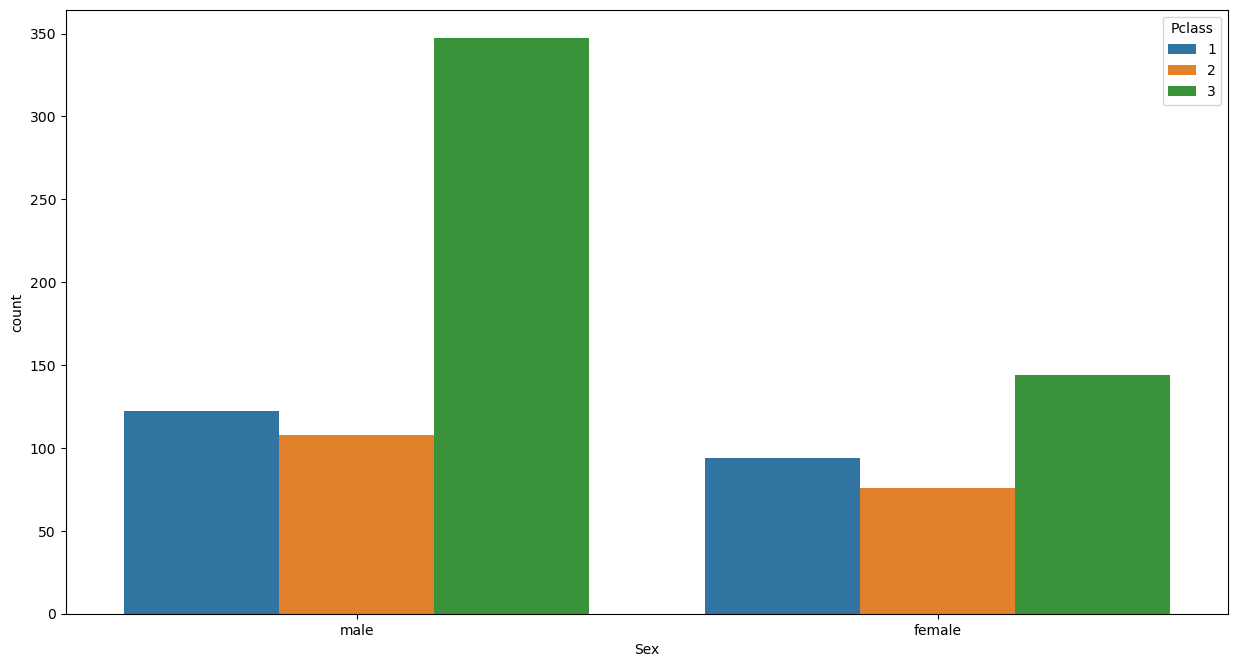

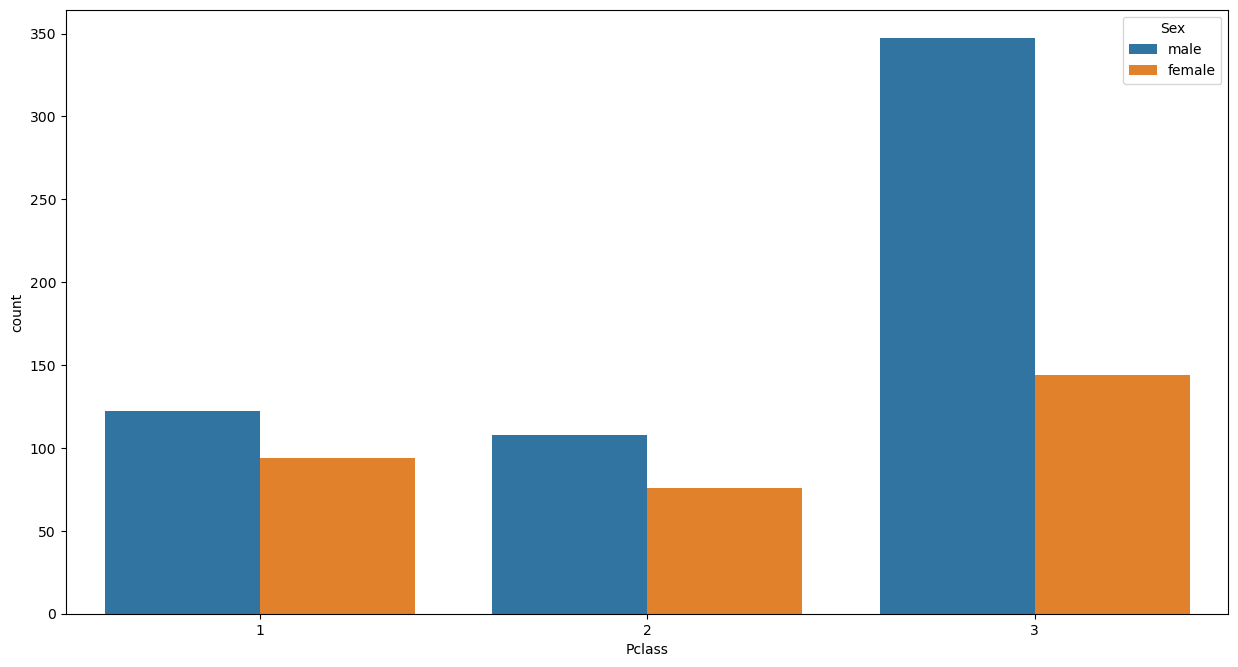

We can conclude from the above graph that the number pf male were more than female in all the classes


In [8]:
sns.countplot(x='Sex',data=df1,hue='Pclass')
plt.show()
sns.countplot(hue='Sex',data=df1,x='Pclass')
plt.show()
print("We can conclude from the above graph that the number pf male were more than female in all the classes")

In [9]:
def male_female_child(passenger):
    age,sex=passenger
    if age<16:
        return 'child'
    else:
        return sex

In [10]:
df1['Person']=df1[['Age','Sex']].apply(male_female_child,axis=1)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


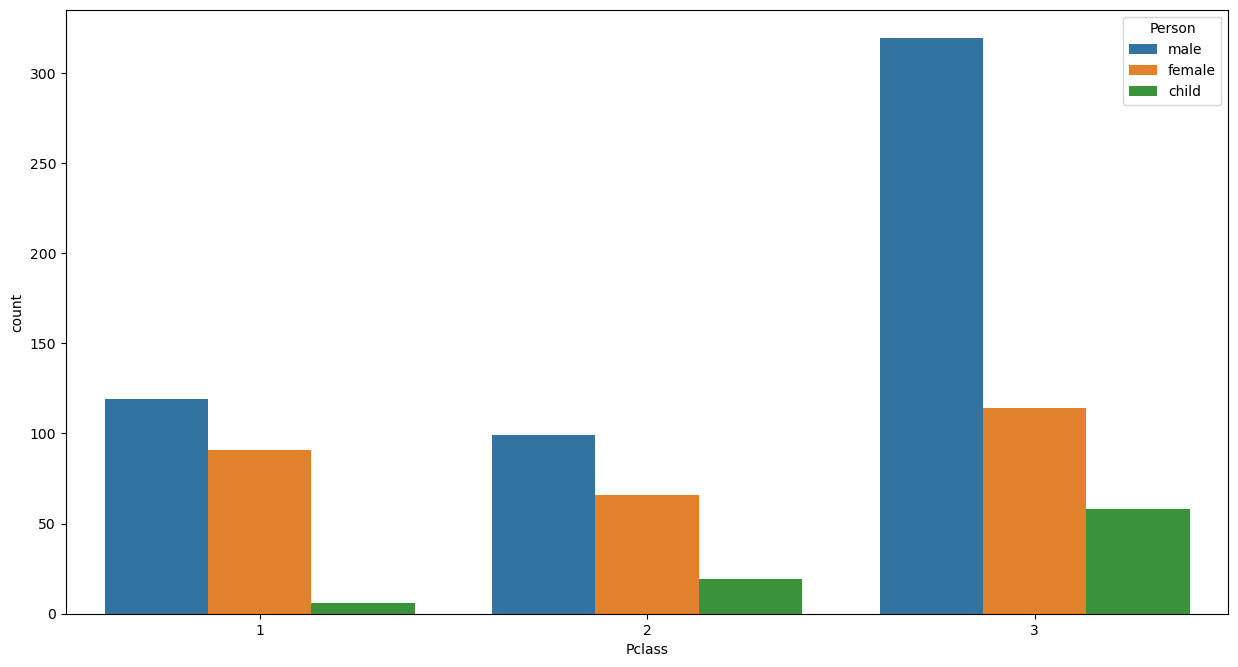

From the graph below we can see that there were many children whose age is less than 16 were also present


In [11]:
sns.countplot(hue='Person',data=df1,x='Pclass')
plt.show()
print("From the graph below we can see that there were many children whose age is less than 16 were also present")

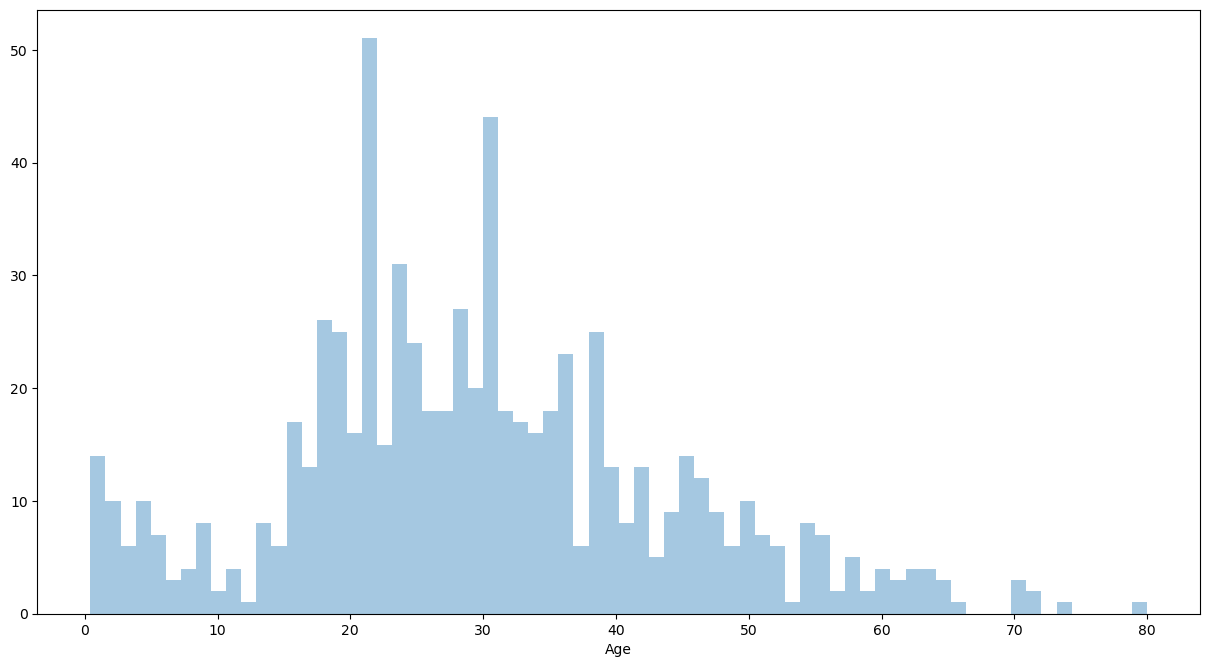

The average age is 29.70 yrs


In [12]:
sns.distplot(df1['Age'],bins=70,kde=False)
plt.show()
print(f"The average age is {df1['Age'].mean():0.2f} yrs")

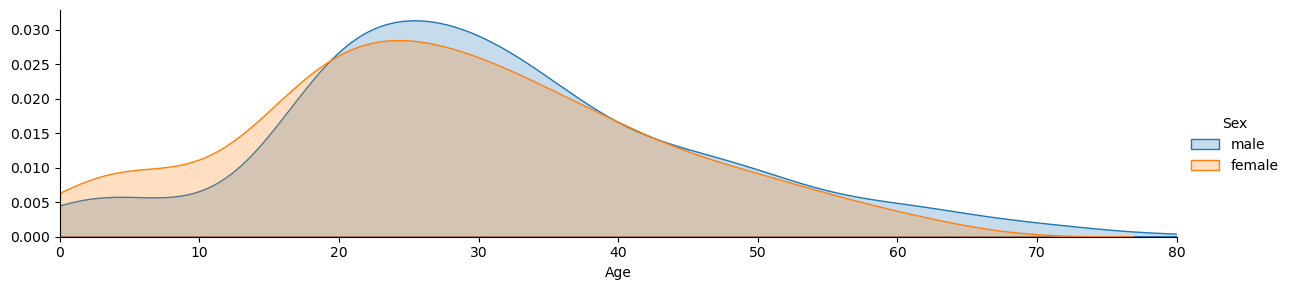

The above plot shows the distribution of age with respect to gender


In [30]:
fig=sns.FacetGrid(df1,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=df1['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()
print("The above plot shows the distribution of age with respect to gender")

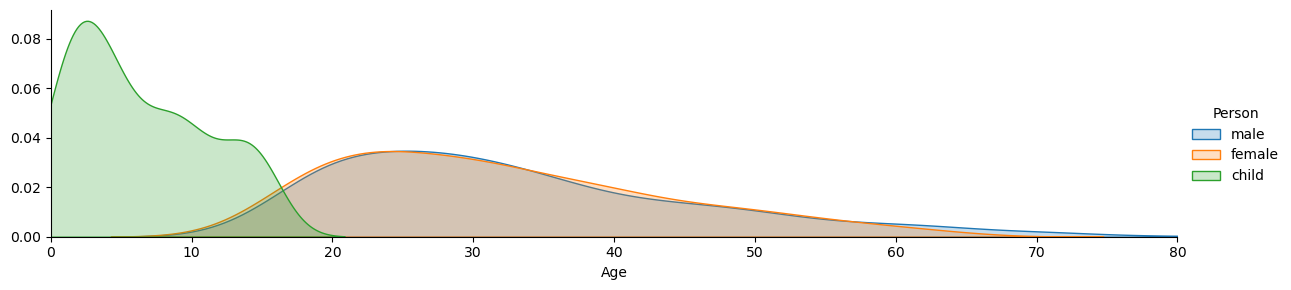

The distribution of age with respect to male, female and child


In [31]:
fig=sns.FacetGrid(df1,hue='Person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=df1['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()
print("The distribution of age with respect to male, female and child")

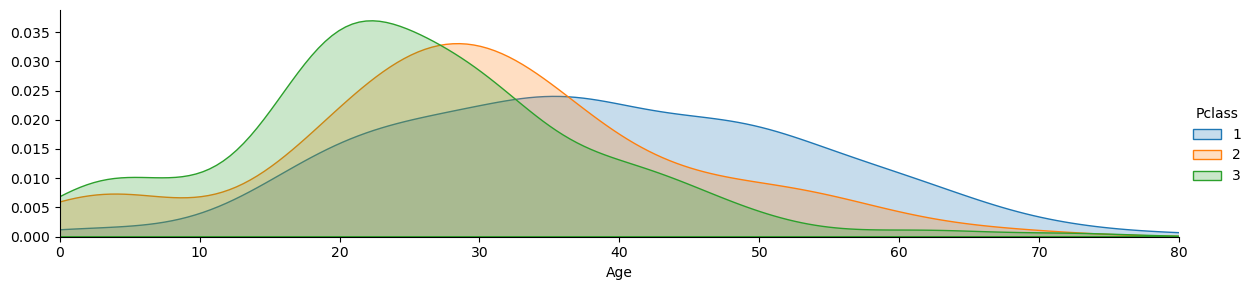

The distribution of age with respect to Pclass


In [32]:
fig=sns.FacetGrid(df1,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=df1['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()
print("The distribution of age with respect to Pclass")

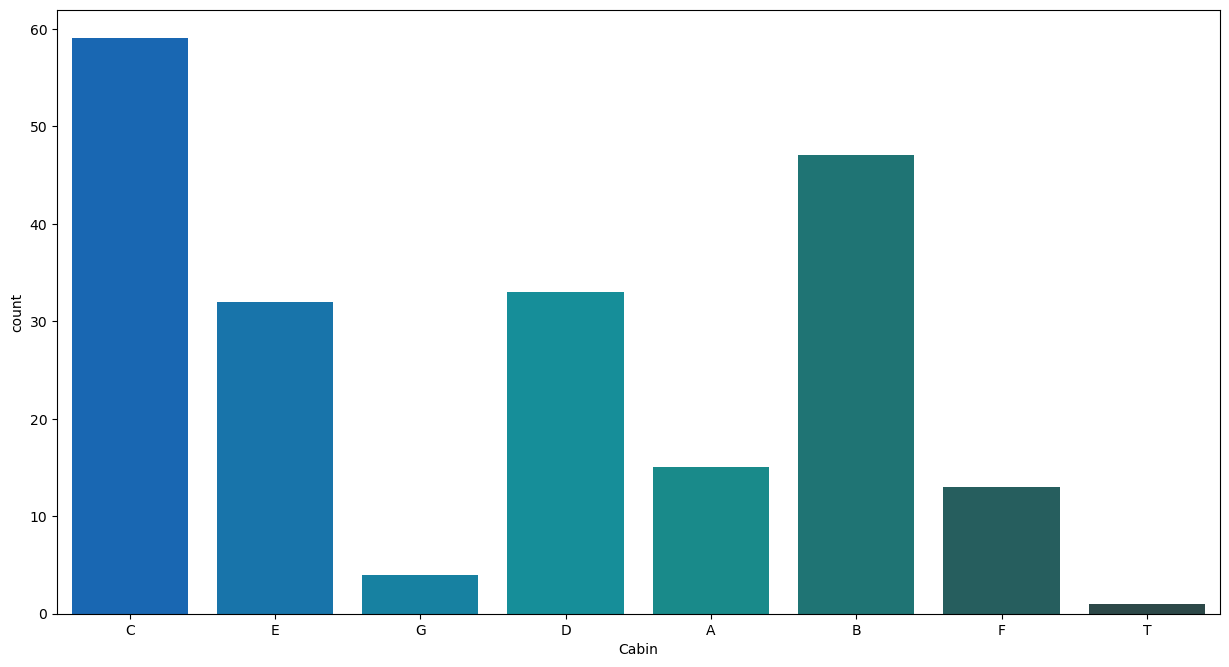

In [33]:
deck=df1['Cabin'].dropna()
deck.head()
levels=[]
for level in deck:
    levels.append(level[0])
cabin_df=pd.DataFrame(levels)
cabin_df.columns=['Cabin']
cabin_df.sort_values(by='Cabin')
sns.countplot(x='Cabin',data=cabin_df,palette='winter_d')
plt.show()

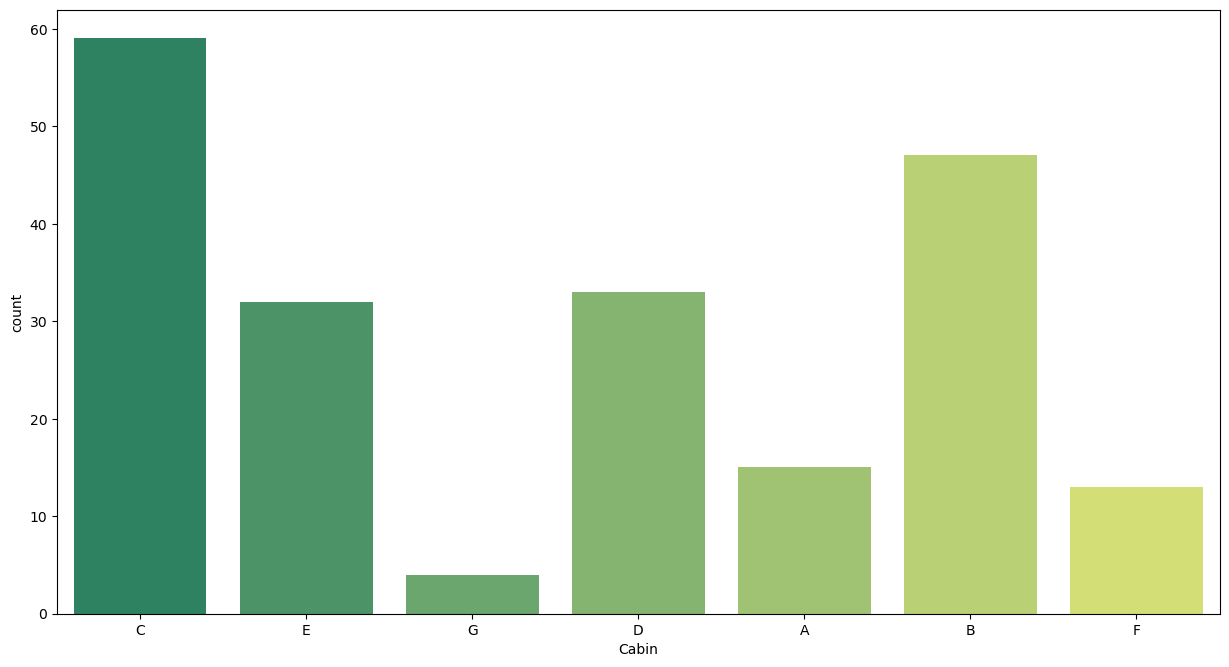

In [19]:
cabin_df=cabin_df[cabin_df!='T']
sns.countplot(x='Cabin',data=cabin_df,palette='summer')
plt.show()

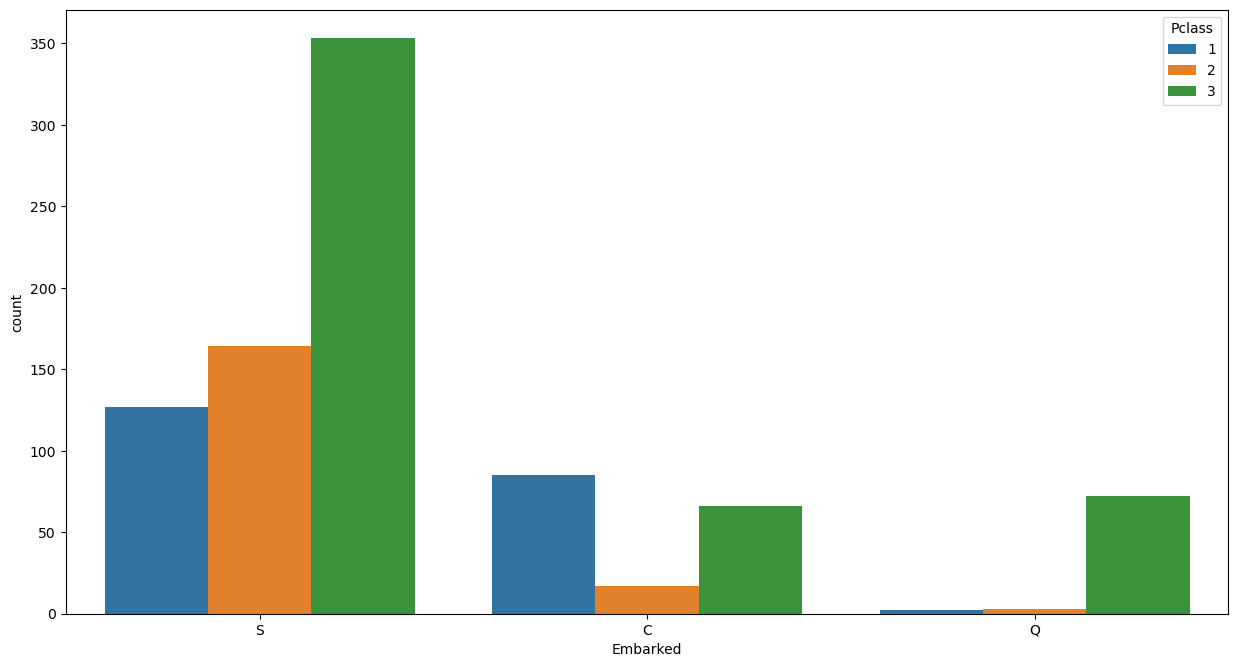

In [20]:
sns.countplot(x='Embarked',data=df1,hue='Pclass')
plt.show()

In [21]:
df1['Family']=df1['SibSp']+df1['Parch']
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [22]:
df1['Family'].loc[df1['Family']>0]='With Family'
df1['Family'].loc[df1['Family']==0]='Alone'

In [23]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


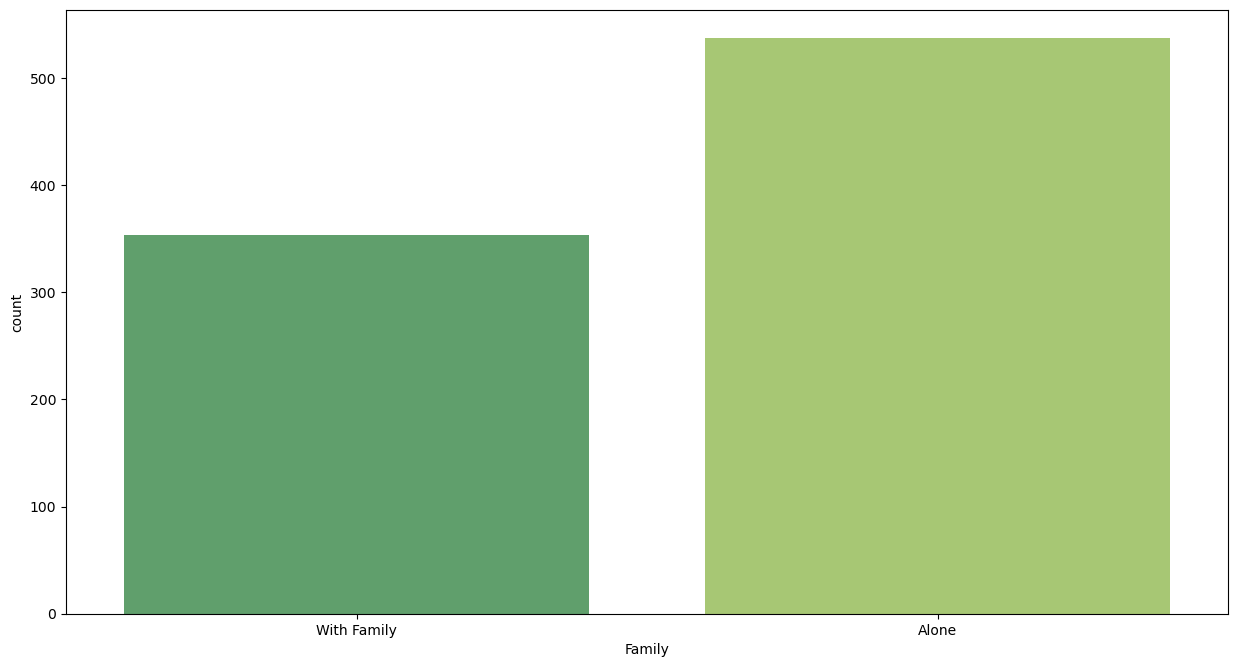

In [24]:
sns.countplot(x='Family',data=df1,palette='summer')
plt.show()

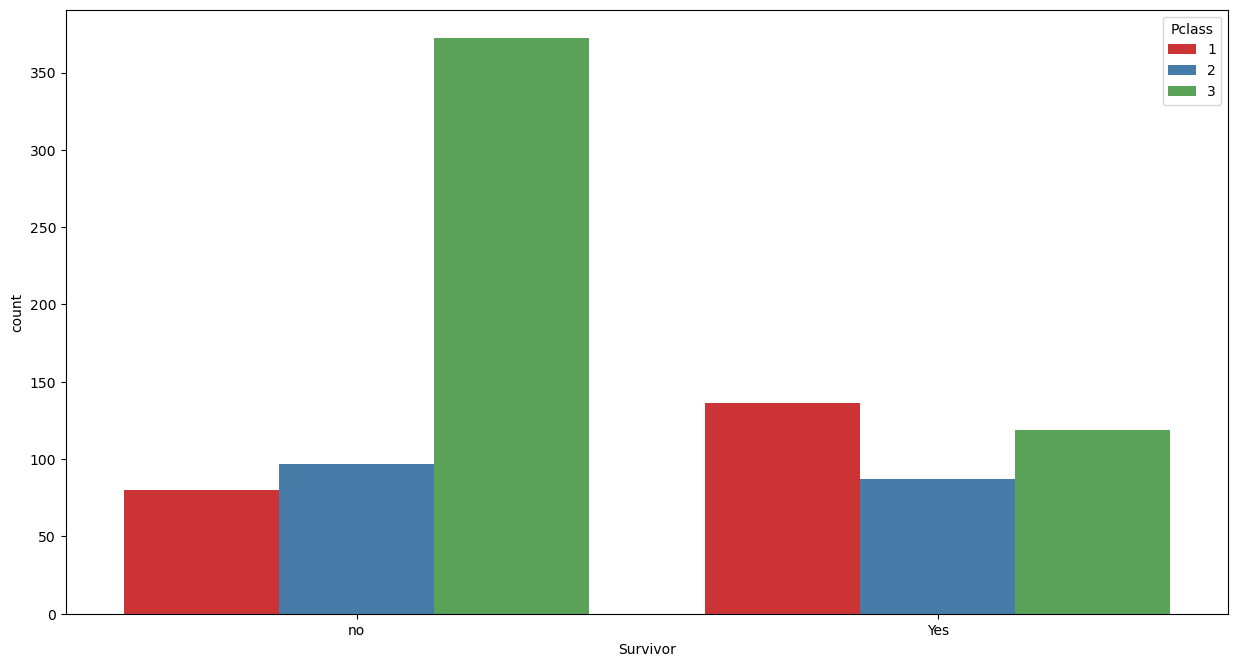

In [25]:
df1['Survivor']=df1['Survived'].map({0:'no',1:'Yes'})
sns.countplot(x='Survivor',data=df1,palette='Set1',hue='Pclass')
plt.show()

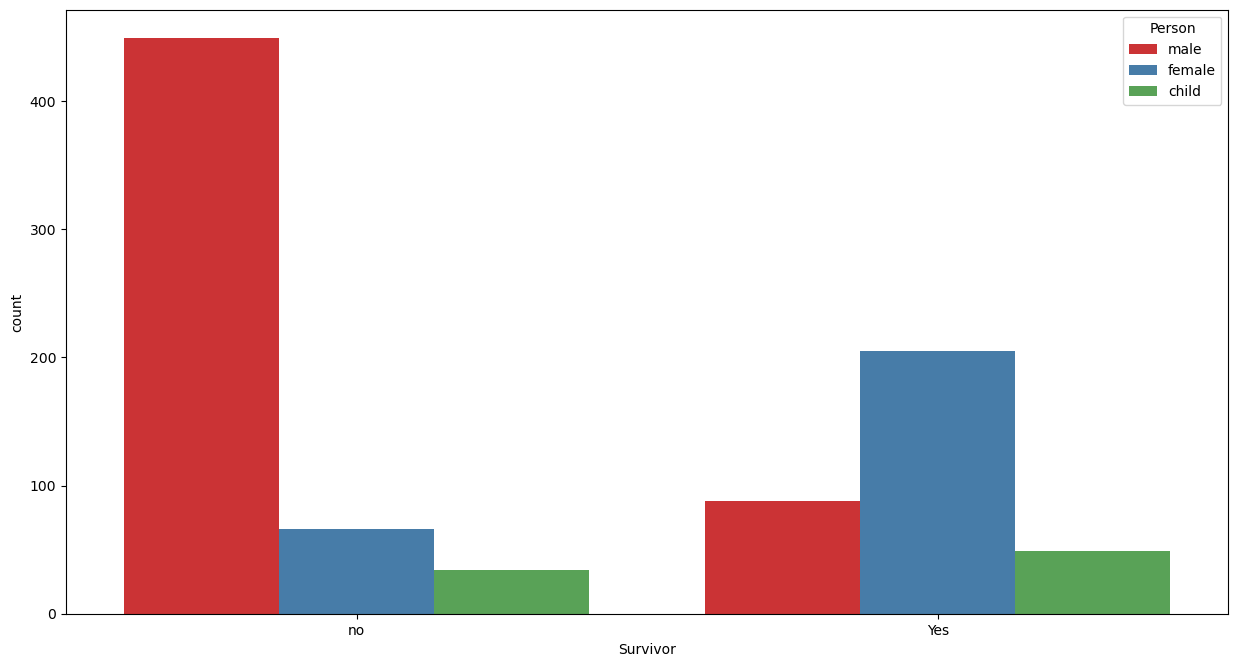

In [26]:
df1['Survivor']=df1['Survived'].map({0:'no',1:'Yes'})
sns.countplot(x='Survivor',data=df1,palette='Set1',hue='Person')
plt.show()

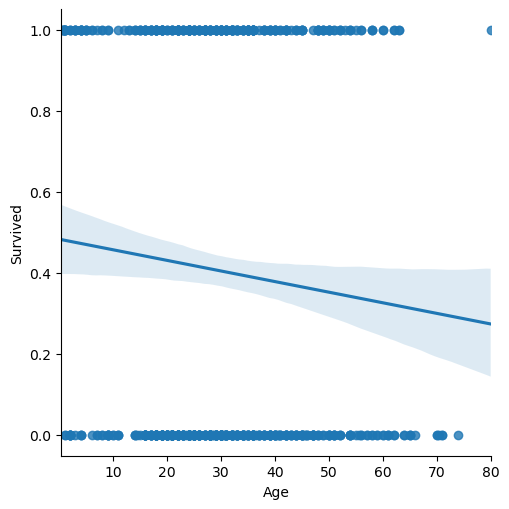

In [27]:
df1['Survivor']=df1['Survived'].map({0:'no',1:'Yes'})
sns.lmplot(x='Age',y='Survived',data=df1)
plt.show()

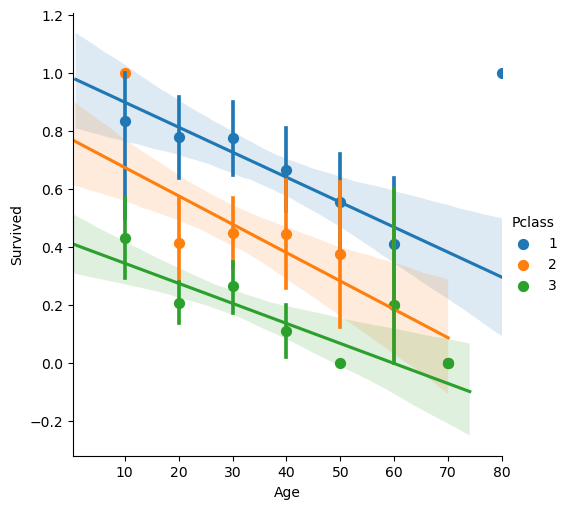

In [28]:
df1['Survivor']=df1['Survived'].map({0:'no',1:'Yes'})
sns.lmplot(x='Age',y='Survived',data=df1,hue='Pclass',x_bins=[10,20,30,40,50,60,70,80])
plt.show()

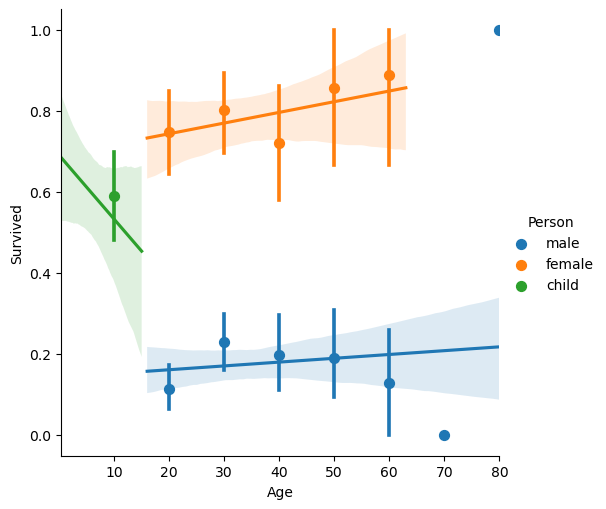

In [29]:
df1['Survivor']=df1['Survived'].map({0:'no',1:'Yes'})
sns.lmplot(x='Age',y='Survived',data=df1,hue='Person',x_bins=[10,20,30,40,50,60,70,80])
plt.show()